In [1]:
#import required modules 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import parallel_backend
from tqdm import tqdm
import tensorflow as tf

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
# Function to implement steps given in previous section
def kmeansgenerate(k, no_of_iterations):
    
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
    
    assert x_train.shape == (60000, 28, 28)
    assert x_test.shape == (10000, 28, 28)
    assert y_train.shape == (60000,)
    assert y_test.shape == (10000,)


    # Flatten the images into vectors
    x_train_flatten = x_train.reshape(x_train.shape[0], -1)
    x_test_flatten = x_test.reshape(x_test.shape[0], -1)

    # Combine the training and testing data
    x_combined = np.concatenate((x_train_flatten, x_test_flatten), axis=0)

    # Step 1: Randomly choosing initial centroids
    idx = np.random.choice(len(x_combined), k, replace=False)

    centroids = x_combined[idx, :]
    size_test = x_combined[:, np.newaxis] - centroids
    # Step 2: Finding the distance between centroids and all the data points
    with parallel_backend('threading'):  # Parallelize computation
        distances = np.linalg.norm(x_combined[:, np.newaxis] - centroids, axis=2)

    # Step 3: Assigning data points to the closest centroid
    points = np.argmin(distances, axis=1)

    # Repeating the above steps for a defined number of iterations with tqdm
    for _ in tqdm(range(no_of_iterations), desc='K-means Iterations'):
        # Step 4: Updating the centroids
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x_combined[points == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)  # Updated Centroids

        # Updating the distances and reassigning the points
        with parallel_backend('threading'):  # Parallelize computation
            distances = np.linalg.norm(x_combined[:, np.newaxis] - centroids, axis=2)
        points = np.argmin(distances, axis=1)

    # Returning the assigned points
    return centroids 





**Generating Image**

In [7]:
k = 30  # Number of clusters
no_of_iterations = 50  # Number of iterations for K-means
centroids = kmeansgenerate(k, no_of_iterations) # Apply K-means clustering
print(centroids.shape)



K-means Iterations: 100%|██████████| 50/50 [08:05<00:00,  9.70s/it]


(30, 784)


ValueError: ignored

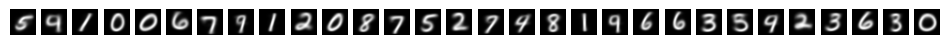

In [8]:
# Generate new digits from the cluster centroids
generated_digits = centroids.reshape(k, 28, 28)


# In[ ]:


fig, axs = plt.subplots(1, k, figsize=(12, 2))
for i in range(k):
  axs[i].imshow(generated_digits[i], cmap='gray')
  axs[i].axis('off')
plt.show()